In [2]:
cd Documents\Github\La_Jara\GW-Hyporheic\Summer2022Hyporheic

C:\Users\nicol\Documents\Github\La_Jara\GW-Hyporheic\Summer2022Hyporheic


In [54]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

#Import Data
#Temperature Probes (Hyporheic Flow)
p4 = pd.read_csv('Summer2022_144_Flow_Probe4.csv').iloc[2642:5783]
p6 = pd.read_csv('Summer2022_144_Flow_Probe6.csv').iloc[2642:5783]
p25 = pd.read_csv('Summer2022_144_Flow_Probe25.csv').iloc[2642:5783]
#Groundwater Wells (Water Table)
gw3 = pd.read_csv('GW3_SUMMER2022.csv').iloc[130:3296]
gw4 = pd.read_csv('GW4_SUMMER2022.csv').iloc[130:3296]
gw5 = pd.read_csv('GW5_SUMMER2022.csv').iloc[130:3296]
gw6 = pd.read_csv('GW6_SUMMER2022.csv').iloc[130:3296]
gw7 = pd.read_csv('GW7_SUMMER2022.csv').iloc[130:3296]
gw8 = pd.read_csv('GW8_SUMMER2022.csv').iloc[130:3296]
gw9 = pd.read_csv('GW9_SUMMER2022.csv').iloc[130:3296]
#Discharge Data
depth = pd.read_csv('P2-C_Summer2022.csv').iloc[802:4215]

#Change tile of date in all columns
gw3.rename(columns={'Date/time': 'Time'}, inplace=True)
gw4.rename(columns={'Date/time': 'Time'}, inplace=True)
gw5.rename(columns={'Date/time': 'Time'}, inplace=True)
gw6.rename(columns={'Date/time': 'Time'}, inplace=True)
gw7.rename(columns={'Date/time': 'Time'}, inplace=True)
gw8.rename(columns={'Date/time': 'Time'}, inplace=True)
gw9.rename(columns={'Date/time': 'Time'}, inplace=True)


In [55]:
#Making a date-time format so in can be easy to plot
from datetime import datetime as dt

#Piezometer
date = []
for fecha in depth['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
depth['new_dates'] = date

#P4
date = []
for fecha in p4['Time']:
    date_time_obj = dt.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
p4['new_dates'] = date

#P6
date = []
for fecha in p6['Time']:
    date_time_obj = dt.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
p6['new_dates'] = date

#P25
date = []
for fecha in p25['Time']:
    date_time_obj = dt.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
p25['new_dates'] = date

#GW3
date = []
for fecha in gw3['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
gw3['new_dates'] = date

#GW4
date = []
for fecha in gw4['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
gw4['new_dates'] = date

#GW5
date = []
for fecha in gw5['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
gw5['new_dates'] = date

#GW6
date = []
for fecha in gw6['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
gw6['new_dates'] = date

#GW7
date = []
for fecha in gw7['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
gw7['new_dates'] = date

#GW8
date = []
for fecha in gw8['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
gw8['new_dates'] = date

#GW9
date = []
for fecha in gw9['Time']:
    date_time_obj = dt.strptime(fecha, '%m/%d/%Y %H:%M')
    date.append(date_time_obj)
new_dates = pd.DataFrame(date)
gw9['new_dates'] = date

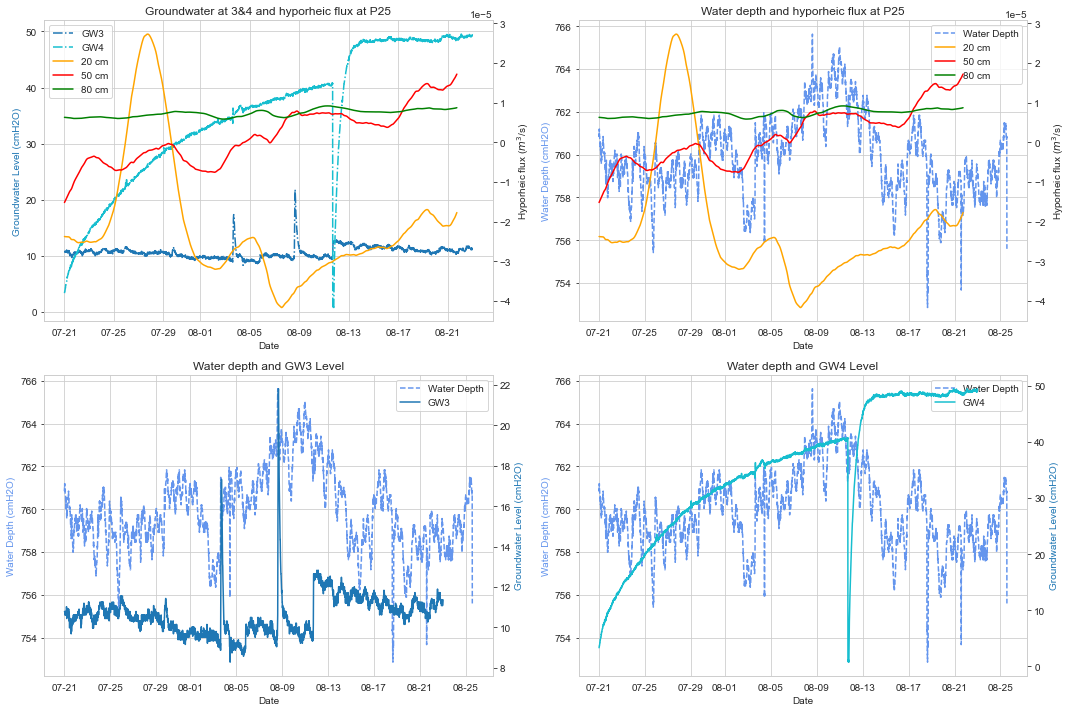

In [68]:
# PLOTTING P25
fig, ((ax1, ax3), (ax5, ax7))= plt.subplots(2,2, figsize=(15, 10))
############################################################################## El de la Derecha ###############################
ax1.set_xlabel('Date')
ax1.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')
lns1 = ax1.plot(gw3['new_dates'], gw3['CompPressure[cmH2O]'], color='tab:blue', linestyle="-.", label='GW3')
lns2 = ax1.plot(gw4['new_dates'], gw4['CompPressure[cmH2O]'], color='tab:cyan', linestyle="-.", label='GW4')
ax1.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

ax2.set_ylabel('Hyporheic flux ($m^3$/s)')  # we already handled the x-label with ax1
lns3 = ax2.plot(p25['new_dates'], p25['Pressure Temp 1'], linestyle='-', color='orange', label='20 cm')
lns4 = ax2.plot(p25['new_dates'], p25['T3'], linestyle="-", color='red', label='50 cm')
lns5 = ax2.plot(p25['new_dates'], p25['Pressure Temp 2'], linestyle="-", color='green', label='80 cm')
ax2.tick_params(axis='y')
ax2.xaxis.set_major_formatter(date_form)

lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.title("Groundwater at 3&4 and hyporheic flux at P25")
plt.grid()
sns.set_style("whitegrid")

################################################################################## El de la Izquierda ###################
ax3.set_xlabel('Date')
ax3.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax3.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax3.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax3.xaxis.set_major_formatter(date_form)
ax4 = ax3.twinx()  # initiate a second axes that shares the same x-axis

ax4.set_ylabel('Hyporheic flux ($m^3$/s)')  # we already handled the x-label with ax1
lns2 = ax4.plot(p25['new_dates'], p25['Pressure Temp 1'], linestyle='-', color='orange', label='20 cm')
lns3 = ax4.plot(p25['new_dates'], p25['T3'], linestyle="-", color='red', label='50 cm')
lns4 = ax4.plot(p25['new_dates'], p25['Pressure Temp 2'], linestyle="-", color='green', label='80 cm')
ax4.tick_params(axis='y')
ax4.xaxis.set_major_formatter(date_form)

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, loc=0)

plt.title("Water depth and hyporheic flux at P25")
plt.grid()
sns.set_style("whitegrid")
########################################################################################## ABAJO IZQ ##########################################

ax5.set_xlabel('Date')
ax5.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax5.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax5.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax5.xaxis.set_major_formatter(date_form)
ax6 = ax5.twinx()  # initiate a second axes that shares the same x-axis

ax6.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')  # we already handled the x-label with ax1
lns2 = ax6.plot(gw3['new_dates'], gw3['CompPressure[cmH2O]'], color='tab:blue', linestyle="-", label='GW3')
ax6.tick_params(axis='y')
ax6.xaxis.set_major_formatter(date_form)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax5.legend(lns, labs, loc=0)

plt.title("Water depth and GW3 Level")
plt.grid()
sns.set_style("whitegrid")

########################################################################################## ABAJO DERECHA ##########################################

ax7.set_xlabel('Date')
ax7.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax7.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax7.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax7.xaxis.set_major_formatter(date_form)
ax8 = ax7.twinx()  # initiate a second axes that shares the same x-axis

ax8.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')  # we already handled the x-label with ax1
lns2 = ax8.plot(gw4['new_dates'], gw4['CompPressure[cmH2O]'], color='tab:cyan', linestyle="-", label='GW4')
ax8.tick_params(axis='y')
ax8.xaxis.set_major_formatter(date_form)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax7.legend(lns, labs, loc=0)

plt.title("Water depth and GW4 Level")
plt.grid()
sns.set_style("whitegrid")
#################################################################################################################################

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("SM22_P25_GW3and4.png", dpi=300)
plt.show()

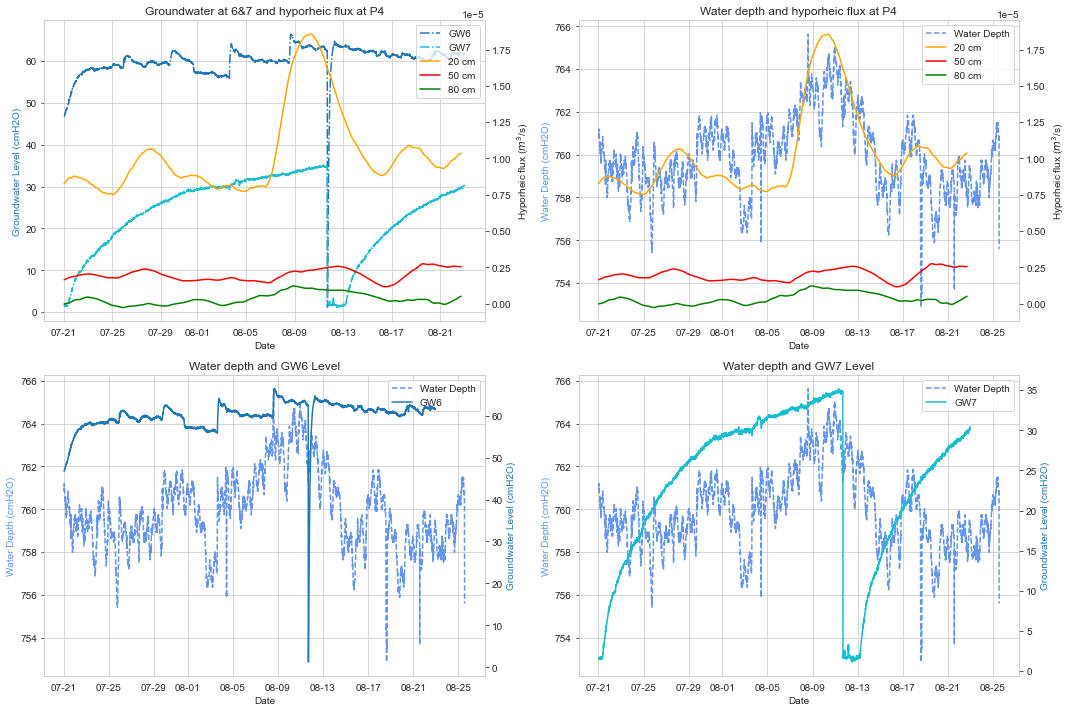

In [64]:
# PLOTTING P4
fig, ((ax1, ax3), (ax5, ax7))= plt.subplots(2,2, figsize=(15, 10))
############################################################################## El de la Derecha ###############################
ax1.set_xlabel('Date')
ax1.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')
lns1 = ax1.plot(gw6['new_dates'], gw6['CompPressure[cmH2O]'], color='tab:blue', linestyle="-.", label='GW6')
lns2 = ax1.plot(gw7['new_dates'], gw7['CompPressure[cmH2O]'], color='tab:cyan', linestyle="-.", label='GW7')
ax1.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

ax2.set_ylabel('Hyporheic flux ($m^3$/s)')  # we already handled the x-label with ax1
lns3 = ax2.plot(p4['new_dates'], p4['Pressure Temp 1'], linestyle='-', color='orange', label='20 cm')
lns4 = ax2.plot(p4['new_dates'], p4['T3'], linestyle="-", color='red', label='50 cm')
lns5 = ax2.plot(p4['new_dates'], p4['Pressure Temp 2'], linestyle="-", color='green', label='80 cm')
ax2.tick_params(axis='y')
ax2.xaxis.set_major_formatter(date_form)

lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.title("Groundwater at 6&7 and hyporheic flux at P4")
plt.grid()
sns.set_style("whitegrid")

################################################################################## El de la Izquierda ###################
ax3.set_xlabel('Date')
ax3.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax3.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax3.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax3.xaxis.set_major_formatter(date_form)
ax4 = ax3.twinx()  # initiate a second axes that shares the same x-axis

ax4.set_ylabel('Hyporheic flux ($m^3$/s)')  # we already handled the x-label with ax1
lns2 = ax4.plot(p4['new_dates'], p4['Pressure Temp 1'], linestyle='-', color='orange', label='20 cm')
lns3 = ax4.plot(p4['new_dates'], p4['T3'], linestyle="-", color='red', label='50 cm')
lns4 = ax4.plot(p4['new_dates'], p4['Pressure Temp 2'], linestyle="-", color='green', label='80 cm')
ax4.tick_params(axis='y')
ax4.xaxis.set_major_formatter(date_form)

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, loc=0)

plt.title("Water depth and hyporheic flux at P4")
plt.grid()
sns.set_style("whitegrid")
########################################################################################## ABAJO IZQ ##########################################

ax5.set_xlabel('Date')
ax5.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax5.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax5.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax5.xaxis.set_major_formatter(date_form)
ax6 = ax5.twinx()  # initiate a second axes that shares the same x-axis

ax6.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')  # we already handled the x-label with ax1
lns2 = ax6.plot(gw6['new_dates'], gw6['CompPressure[cmH2O]'], color='tab:blue', linestyle="-", label='GW6')
ax6.tick_params(axis='y')
ax6.xaxis.set_major_formatter(date_form)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax5.legend(lns, labs, loc=0)

plt.title("Water depth and GW6 Level")
plt.grid()
sns.set_style("whitegrid")

########################################################################################## ABAJO DERECHA ##########################################

ax7.set_xlabel('Date')
ax7.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax7.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax7.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax7.xaxis.set_major_formatter(date_form)
ax8 = ax7.twinx()  # initiate a second axes that shares the same x-axis

ax8.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')  # we already handled the x-label with ax1
lns2 = ax8.plot(gw7['new_dates'], gw7['CompPressure[cmH2O]'], color='tab:cyan', linestyle="-", label='GW7')
ax8.tick_params(axis='y')
ax8.xaxis.set_major_formatter(date_form)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax7.legend(lns, labs, loc=0)

plt.title("Water depth and GW7 Level")
plt.grid()
sns.set_style("whitegrid")
#################################################################################################################################

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("SM22_P4_GW6and7.png", dpi=300)
plt.show()

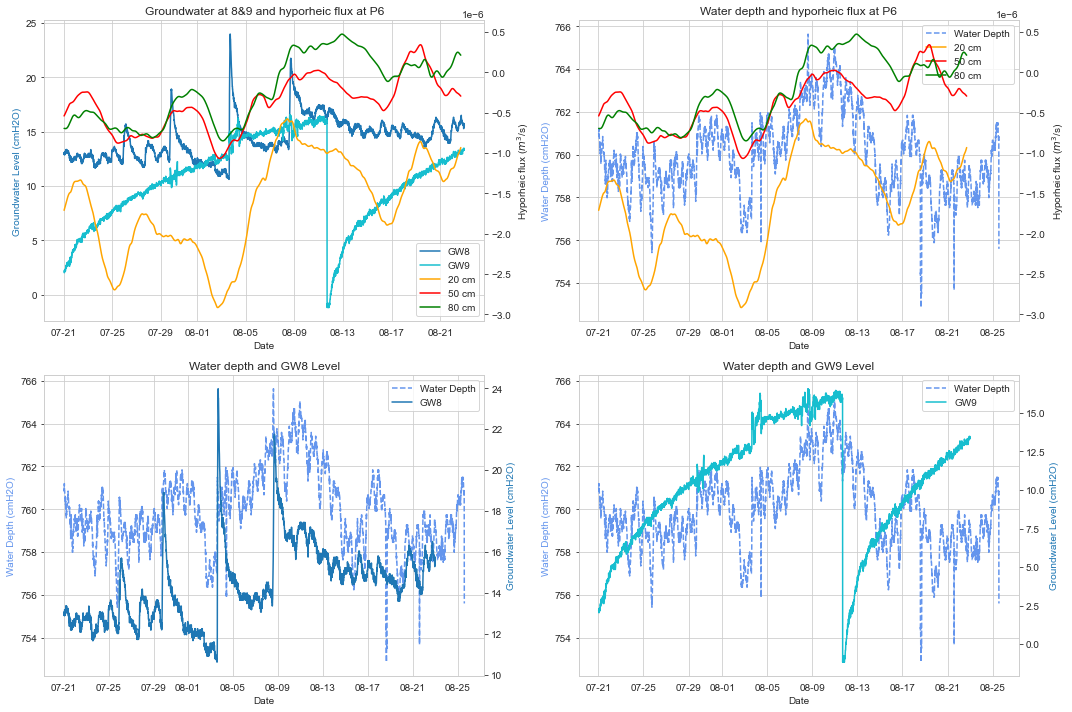

In [67]:
# PLOTTING P6
fig, ((ax1, ax3), (ax5, ax7))= plt.subplots(2,2, figsize=(15, 10))
############################################################################## El de la Derecha ###############################
ax1.set_xlabel('Date')
ax1.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')
lns1 = ax1.plot(gw8['new_dates'], gw8['CompPressure[cmH2O]'], color='tab:blue', linestyle="-", label='GW8')
lns2 = ax1.plot(gw9['new_dates'], gw9['CompPressure[cmH2O]'], color='tab:cyan', linestyle="-", label='GW9')
ax1.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

ax2.set_ylabel('Hyporheic flux ($m^3$/s)')  # we already handled the x-label with ax1
lns3 = ax2.plot(p6['new_dates'], p6['Pressure Temp 1'], linestyle='-', color='orange', label='20 cm')
lns4 = ax2.plot(p6['new_dates'], p6['T3'], linestyle="-", color='red', label='50 cm')
lns5 = ax2.plot(p6['new_dates'], p6['Pressure Temp 2'], linestyle="-", color='green', label='80 cm')
ax2.tick_params(axis='y')
ax2.xaxis.set_major_formatter(date_form)

lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.title("Groundwater at 8&9 and hyporheic flux at P6")
plt.grid()
sns.set_style("whitegrid")

################################################################################## El de la Izquierda ###################
ax3.set_xlabel('Date')
ax3.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax3.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax3.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax3.xaxis.set_major_formatter(date_form)
ax4 = ax3.twinx()  # initiate a second axes that shares the same x-axis

ax4.set_ylabel('Hyporheic flux ($m^3$/s)')  # we already handled the x-label with ax1
lns2 = ax4.plot(p6['new_dates'], p6['Pressure Temp 1'], linestyle='-', color='orange', label='20 cm')
lns3 = ax4.plot(p6['new_dates'], p6['T3'], linestyle="-", color='red', label='50 cm')
lns4 = ax4.plot(p6['new_dates'], p6['Pressure Temp 2'], linestyle="-", color='green', label='80 cm')
ax4.tick_params(axis='y')
ax4.xaxis.set_major_formatter(date_form)

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, loc=0)

plt.title("Water depth and hyporheic flux at P6")
plt.grid()
sns.set_style("whitegrid")
########################################################################################## ABAJO IZQ ##########################################

ax5.set_xlabel('Date')
ax5.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax5.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax5.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax5.xaxis.set_major_formatter(date_form)
ax6 = ax5.twinx()  # initiate a second axes that shares the same x-axis

ax6.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')  # we already handled the x-label with ax1
lns2 = ax6.plot(gw8['new_dates'], gw8['CompPressure[cmH2O]'], color='tab:blue', linestyle="-", label='GW8')
ax6.tick_params(axis='y')
ax6.xaxis.set_major_formatter(date_form)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax5.legend(lns, labs, loc=0)

plt.title("Water depth and GW8 Level")
plt.grid()
sns.set_style("whitegrid")

########################################################################################## ABAJO DERECHA ##########################################

ax7.set_xlabel('Date')
ax7.set_ylabel('Water Depth (cmH2O)', color='cornflowerblue')
lns1 = ax7.plot(depth['new_dates'], depth['Pressure[cmH2O]'], color='cornflowerblue', linestyle="dashed", label='Water Depth')
ax7.tick_params(axis='y')

from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax7.xaxis.set_major_formatter(date_form)
ax8 = ax7.twinx()  # initiate a second axes that shares the same x-axis

ax8.set_ylabel('Groundwater Level (cmH2O)', color='tab:blue')  # we already handled the x-label with ax1
lns2 = ax8.plot(gw9['new_dates'], gw9['CompPressure[cmH2O]'], color='tab:cyan', linestyle="-", label='GW9')
ax8.tick_params(axis='y')
ax8.xaxis.set_major_formatter(date_form)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax7.legend(lns, labs, loc=0)

plt.title("Water depth and GW9 Level")
plt.grid()
sns.set_style("whitegrid")
#################################################################################################################################

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("SM22_P6_GW8and9.png", dpi=300)
plt.show()